In [36]:
# import cmdstanpy 
# cmdstanpy.install_cmdstan() 
# cmdstanpy.install_cmdstan(compiler=True)

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [37]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

df = pd.read_csv('CR_FC_PREP_0522.csv')
df['POD'] = pd.to_datetime(df['POD'])

df.head()
df.info()
print(f'Dataset size: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB
Dataset size: (6375, 2)


In [38]:
df = df.rename(columns={'POD': 'ds', 'RATE': 'y'})
df.head()

,ds,y
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


In [39]:
m = Prophet(daily_seasonality=True)
m.fit(df)

23:43:34 - cmdstanpy - INFO - Chain [1] start processing
23:43:36 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6735,2023-12-27
6736,2023-12-28
6737,2023-12-29
6738,2023-12-30
6739,2023-12-31


In [41]:
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6735,2023-12-27,11283.417095,10195.227380,12364.397319
6736,2023-12-28,11317.664953,10217.449366,12495.906626
6737,2023-12-29,11334.358791,10226.071537,12539.048136
6738,2023-12-30,11349.853978,10237.932194,12476.818506
6739,2023-12-31,11368.388611,10198.811162,12572.167698


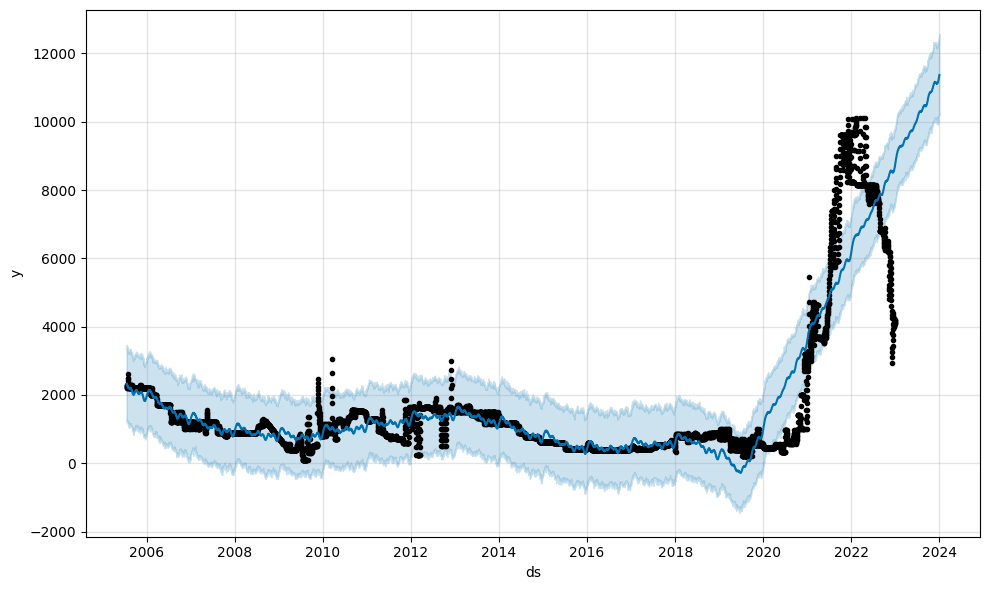

In [42]:
fig1 = m.plot(forecast)

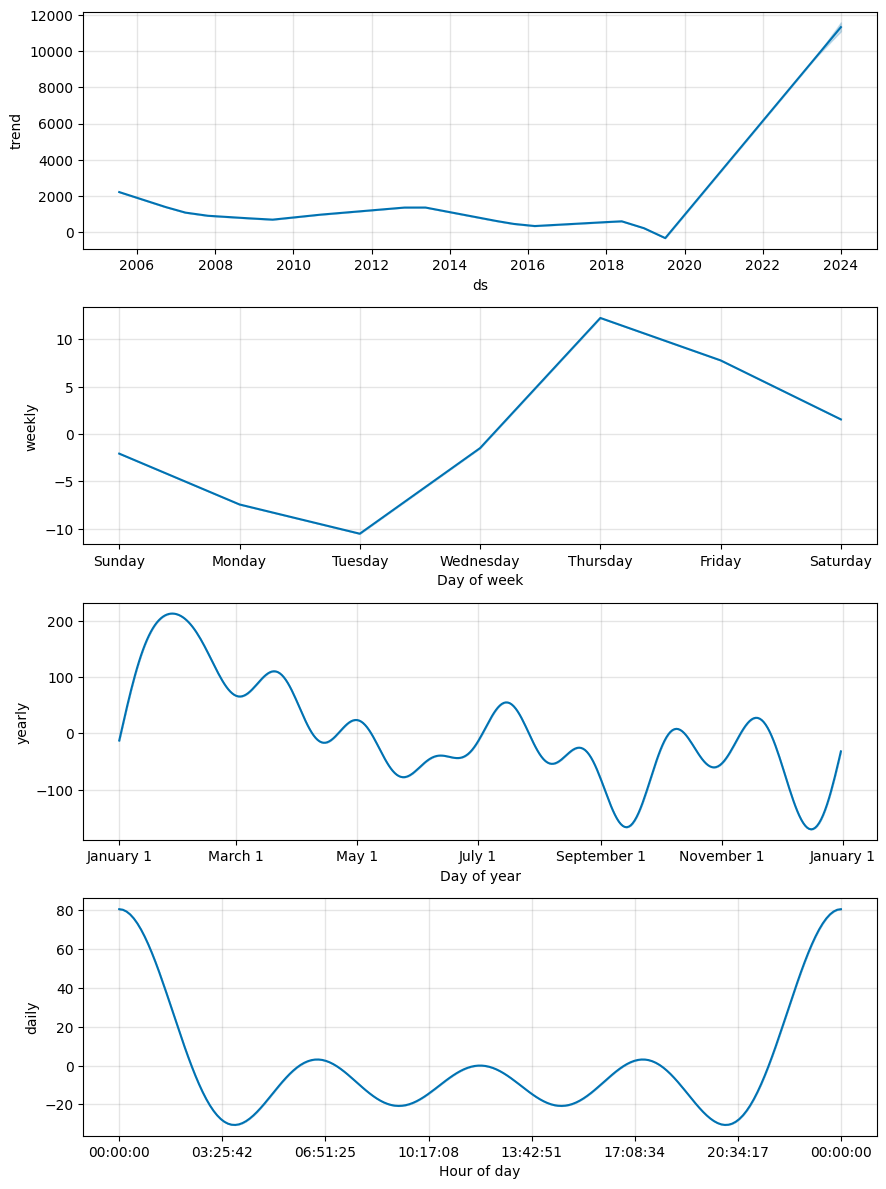

In [43]:
fig2 = m.plot_components(forecast)

In [44]:
plot_plotly(m, forecast)

In [45]:
plot_components_plotly(m, forecast)